In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
my_example_nc_file = 'GRIDONE_1D.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [3]:
z = fh.variables['z'][:]
dim = fh['dimension'][:]
z = np.flipud(np.reshape(z,dim,order='F').T)

In [4]:
(x0,xf) = fh.variables['x_range'][:]
(y0,yf) = fh.variables['y_range'][:]
dx = fh.variables['spacing'][0]
x = np.arange(x0,xf+dx,dx)
y = np.arange(y0,yf+dx,dx)

(-200.0, 200.0, -100.0, 100.0)

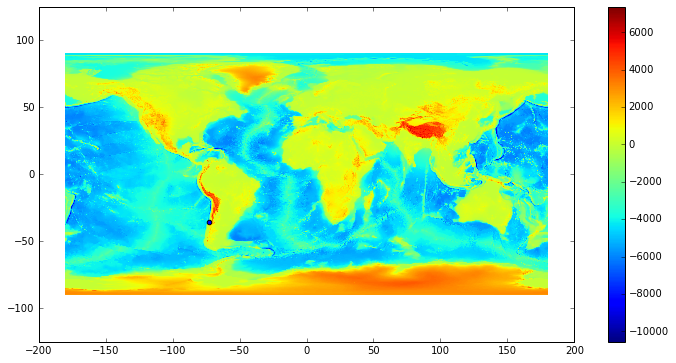

In [5]:
r = 5
x2 = x[::r]
y2 = y[::r]
z2 = z[::r,::r]

plt.figure(figsize=(12,6))
plt.pcolormesh(x2,y2,z2)
plt.colorbar()
plt.scatter(-73,-35.5)
plt.axis('equal')

In [6]:
z2.shape

(2161, 4321)

## Center around pacific ocean and trim north and south poles

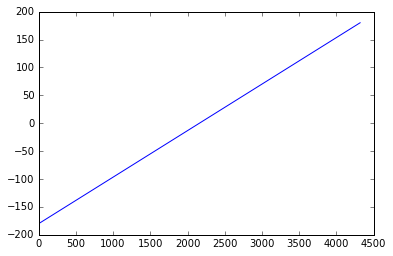

In [7]:
plt.plot(x2)

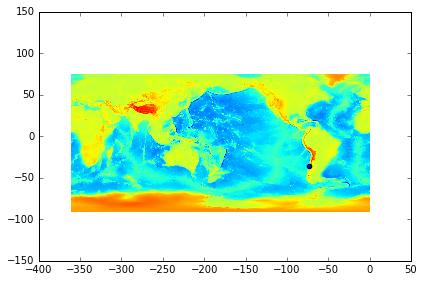

In [40]:
j0 = 0#1800/2/2/2
jf = 9000+900
# j0 = 500
# jf = -500
x3 = np.hstack((x[10800:]-180*2,x[:10800]))[::r]
y3 = y[j0:jf][::r]
z3 = np.hstack((z[j0:jf,10800:],z[j0:jf,:10800]))[::r,::r]
plt.pcolormesh(x3,y3,z3)
plt.scatter(-73,-35.5)
plt.axis('equal')
plt.tight_layout()

In [42]:
x3.min(),y3.max()

(-359.99999999985675, 74.916666666657306)

## pick only x3>-240

plt.plot(x3)

pick = np.where(x3>-240)[0]
x4 = x3[pick]
z4= z3[:,pick]

plt.pcolormesh(x4,y3,z4)
plt.axis('equal')
plt.tight_layout()

x3 = x4
z3 = z4

## Save bathymetry data files

In [43]:
def saveImage(x,y,z,rootName):
    from scipy.misc import toimage
    im = toimage(np.flipud(z))
    print im
    im.save(rootName+'.jpg')
    f = open(rootName+'.txt','w')
    f.write('ny   :%i\n'%z.shape[0])
    f.write('nx   :%i\n'%z.shape[1])
    f.write('xmin :%.3f\n'%x.min())
    f.write('xmax :%.3f\n'%x.max())
    f.write('ymin :%.3f\n'%y.min())
    f.write('ymax :%.3f\n'%y.max())
    f.write('zmin :%.3f\n'%z.min())
    f.write('zmax :%.3f\n'%z.max())
    f.close()      

In [44]:
saveImage(x3,y3,z3, 'batiWorld')

<PIL.Image.Image image mode=L size=4321x1980 at 0x7F2394F08710>


In [45]:
saveImage?

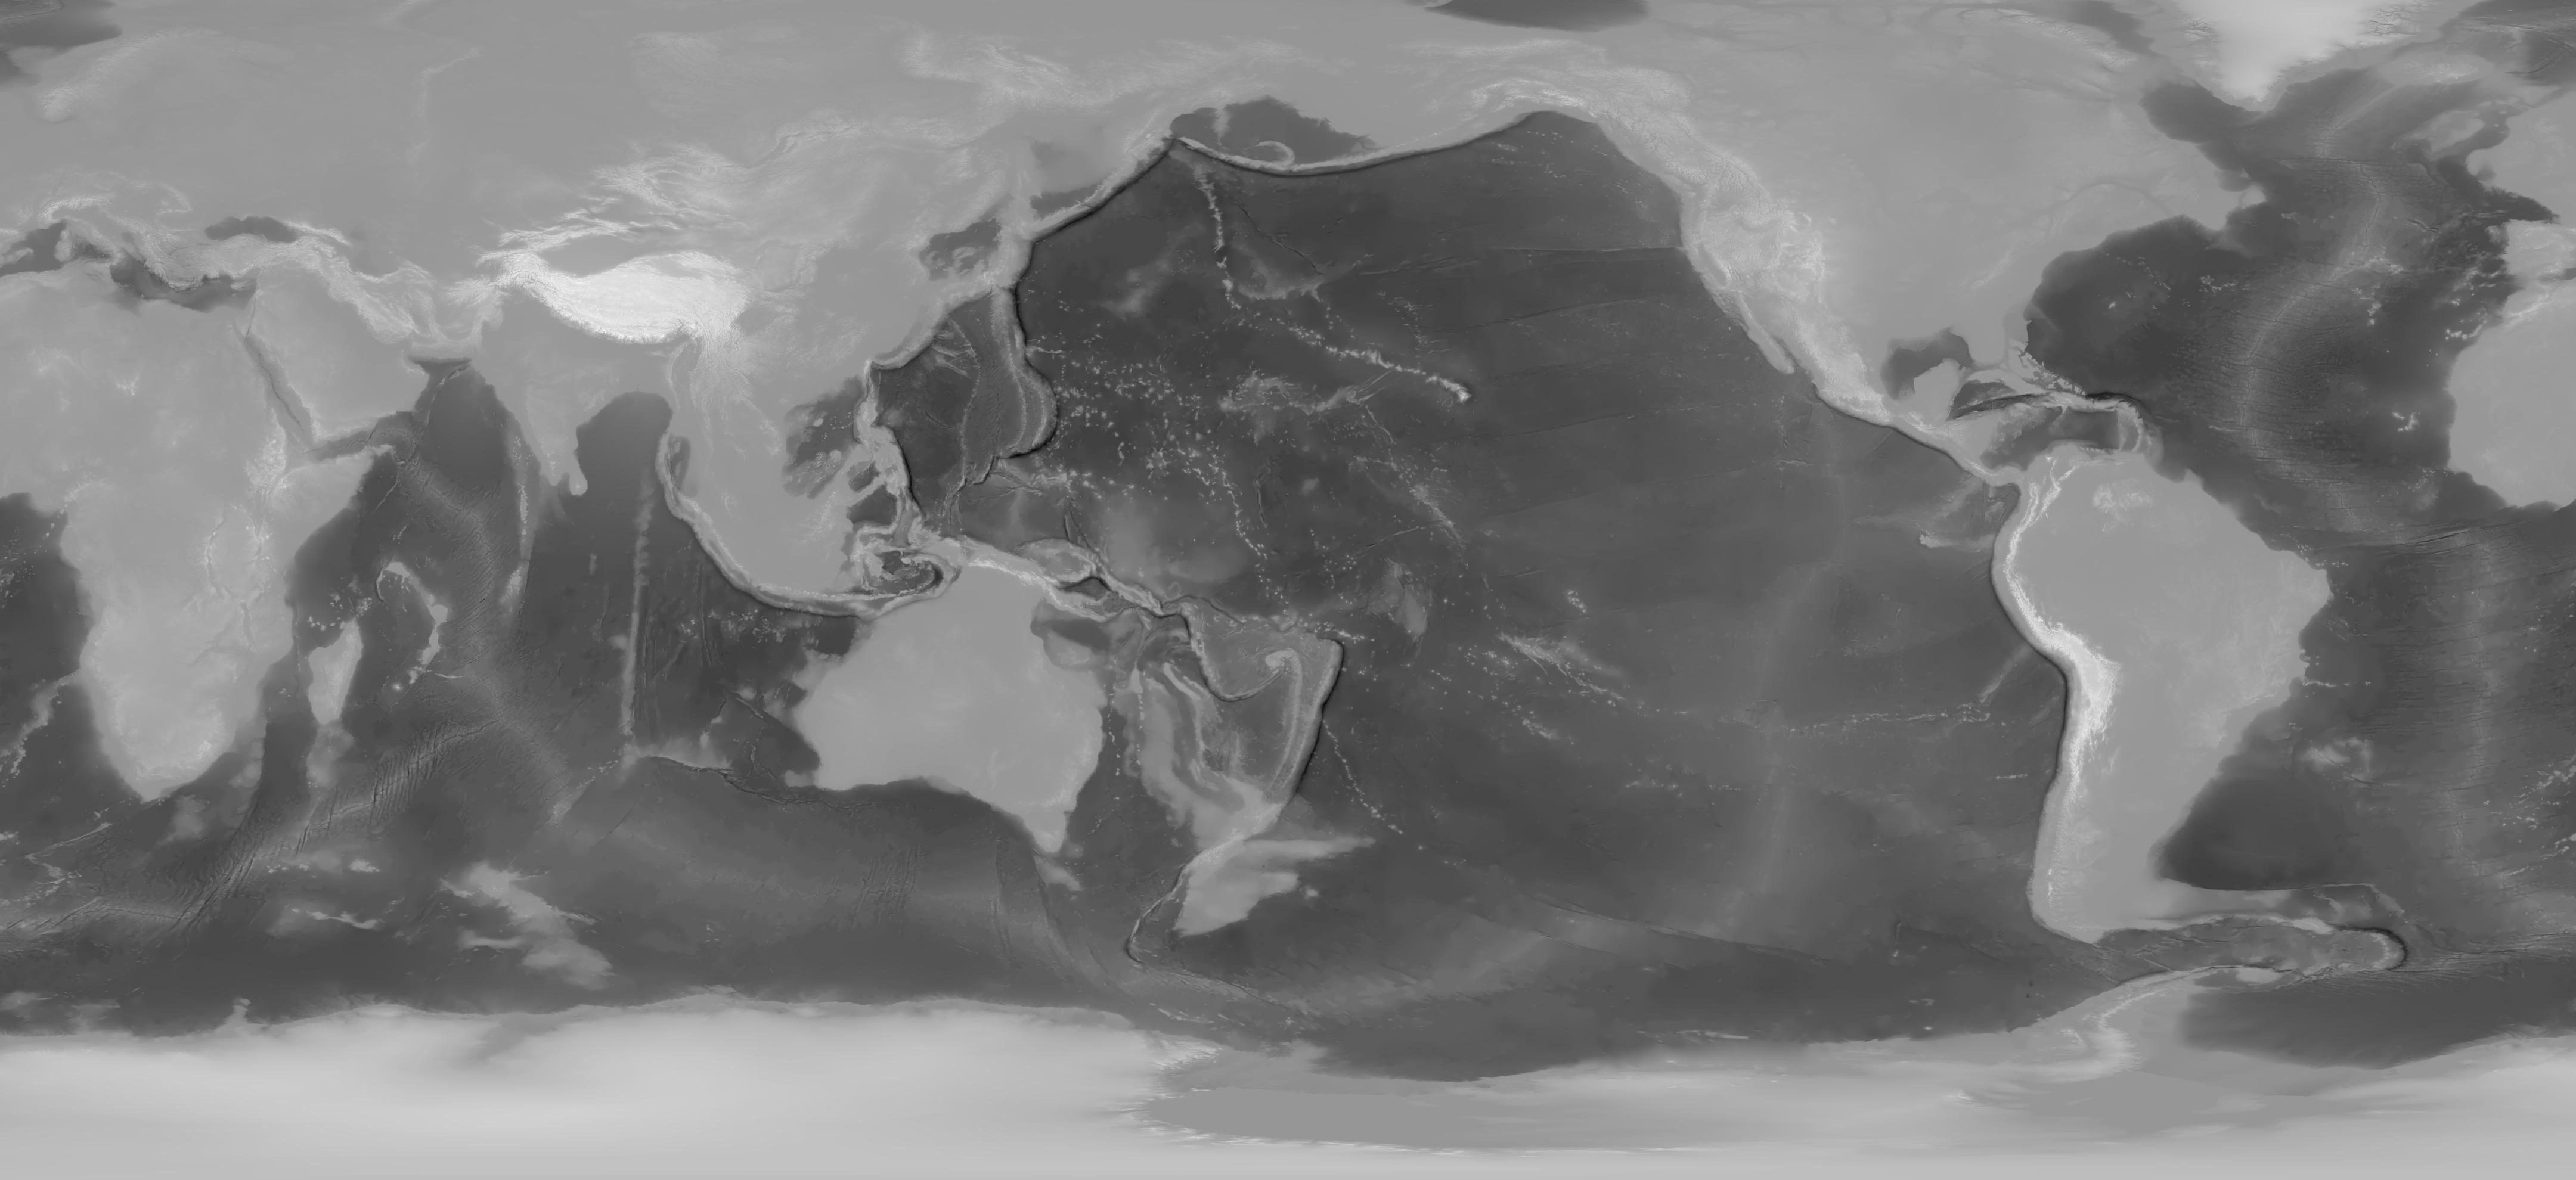

In [46]:
from IPython.display import Image
Image('batiWorld.jpg')

In [47]:
!cat batiWorld.txt

ny   :1980
nx   :4321
xmin :-360.000
xmax :-0.017
ymin :-90.000
ymax :74.917
zmin :-10559.000
zmax :7357.000


In [48]:
!cp batiWorld.jpg ../../web/app/img/batiWorld.jpg
!cp batiWorld.txt ../../web/app/img/batiWorld.txt

## Create a texture for displaying

In [ ]:
def custom_cmap_norm(z):
    import matplotlib.colors as mcolors
    import clawpack.visclaw.colormaps as colormaps
    sea_cmap = colormaps.make_colormap({ 0.0: [0.0, 0.0, 0.1],
                                     1.0: [0.4,0.4,0.6]})
    cut1 = -z.min()*1.0/(z.max()-z.min())
    cut2 = (2000.0-z.min())/(z.max()-z.min())
    ncolor1 = int(256*cut1)
    ncolor2 = int(256*cut2)-ncolor1
    ncolor3 = int(256)-ncolor1-ncolor2
    colors1 = sea_cmap(np.linspace(0., 1, ncolor1))
    colors2 = plt.cm.YlGn_r(np.linspace(0., 1, ncolor2))
    colors3 = plt.cm.YlOrBr(np.linspace(0., 1., ncolor3))
    colors = np.vstack((colors1, colors2,colors3))
    cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
    N = 256
    bounds = np.empty(N)
    bounds[:ncolor1] = np.linspace(z.min(), 0.0, ncolor1)
    bounds[ncolor1:(ncolor1+ncolor2)] = np.linspace(0.0, 2000, ncolor2)
    bounds[(ncolor1+ncolor2):] = np.linspace(2000, z.max(), ncolor3)

    norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=N)
    return cmap,norm

In [ ]:
cmap, norm = custom_cmap_norm(z3)

In [ ]:
from scipy.misc import toimage

In [ ]:
Map = z3
im = toimage(cmap(norm(np.flipud(Map))))
im.save('batiWorldMap.jpg')
!cp batiWorldMap.jpg ../../web/img/.

In [ ]:
im

## Bump map for light effect

In [ ]:
bumpMap = np.where(z3<0,0.0,z3)

In [ ]:
im = toimage(np.flipud(bumpMap))
im.save('batiWorldBumpMap.jpg')
!cp batiWorldBumpMap.jpg ../../web/img/.

In [ ]:
im

## Specular map for shinny effect 

In [ ]:
specMap = np.where(z3<0,1.0,0.0)
im = toimage(np.flipud(specMap))
im.save('batiWorldSpecMap.jpg')
!cp batiWorldSpecMap.jpg ../../web/img/.

In [ ]:
im